<h2>8.18. 
List of all samples of size n=2 </h2>

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

population = [9, 12, 15]  

samples = list(itertools.product(population, repeat=2))

sample = pd.DataFrame(samples, columns=['Sample 1', 'Sample 2'])

display(sample)

,Sample 1,Sample 2
0,9,9
1,9,12
2,9,15
3,12,9
4,12,12
5,12,15
6,15,9
7,15,12
8,15,15


<h2>Occurrences and probabilities of each sample mean (X̄) </h2>

,Sample Mean (X̄),Occurrences,Probability
0,9.0,1,0.111111
1,10.5,2,0.222222
2,12.0,3,0.333333
3,13.5,2,0.222222
4,15.0,1,0.111111


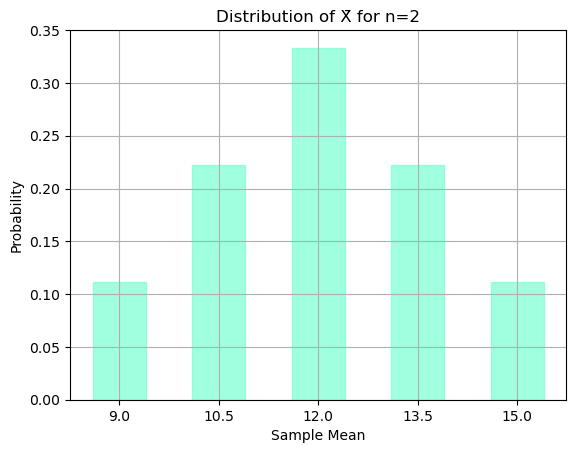

In [4]:
samplemeans = [np.mean(sample) for sample in samples]

uniquemeans, counts = np.unique(samplemeans, return_counts=True)

probabilities = counts / len(samplemeans)

distribution = pd.DataFrame({
    'Sample Mean (X̄)': uniquemeans,
    'Occurrences': counts,
    'Probability': probabilities
})

display(distribution)


plt.bar(uniquemeans, probabilities, color = 'aquamarine',edgecolor='aquamarine', alpha=0.75)
plt.title('Distribution of X̄ for n=2')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.xticks(uniquemeans)
plt.grid(True)
plt.show()

<h2>Show that μx̄ = μ and σ²x̄ = σ²/2 </h2>

In [5]:
μ = np.mean(population) 
var = np.var(population) 

μofx̄ = np.mean(samplemeans)  
varofx̄ = np.var(samplemeans) 

print(f"μ: {μ}")
print(f"μofx̄: {μofx̄}")
print(f"σ²ofx̄: {varofx̄}")
print(f"σ²/2: {var/2}")

μ: 12.0
μofx̄: 12.0
σ²ofx̄: 3.0
σ²/2: 3.0


<h2>8.21. A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be
drawn with replacement from this population.</h2>

In [63]:
import numpy as np
from itertools import product

population = [3, 7, 11, 15]

samples = list(product(population, repeat=2))

samplemeans = []
for sample in samples:
    samplemean = sum(sample) / len(sample) 
    samplemeans.append(samplemean)

samplesdf = pd.DataFrame({'Sample': samples, 'Mean': samplemeans})
display(samplesdf)

,Sample,Mean
0,"(3, 3)",3.0
1,"(3, 7)",5.0
2,"(3, 11)",7.0
3,"(3, 15)",9.0
4,"(7, 3)",5.0
5,"(7, 7)",7.0
6,"(7, 11)",9.0
7,"(7, 15)",11.0
8,"(11, 3)",7.0
9,"(11, 7)",9.0


*(a) population mean*

In [8]:
populationmean = sum(population) / len(population)
print("Population Mean:", populationmean)

Population Mean: 9.0


*(b) population standard deviation*

In [56]:
squarediffs = [(x - populationmean) ** 2 for x in population]
populationvariance = sum(squarediffs) / len(population)

populationstd = populationvariance ** 0.5
print("Population standard deviation:", round(populationstd, 4))

Population standard deviation: 5.3852


*(c) Mean of the Sampling Distribution of Means*

In [62]:
samplingdistributionmean = sum(samplemeans) / len(samplemeans)

print("Mean of the Sampling Distribution of Means:", samplingdistributionmean)

Mean of the Sampling Distribution of Means: 12.0


*(d) Standard deviation of the sampling
distribution of means.*

In [60]:
samplingdistributionstd = np.std(populationmean, ddof=0)

print("Standard Deviation of the Sampling Distribution of Means:", samplingdistributionstd)

Standard Deviation of the Sampling Distribution of Means: 0.0


*Verify parts (c) and (d ) directly from (a) and (b)*

In [15]:
n = 2  
theoreticalsamplingdistributionmean = populationmean
theoreticalsamplingdistributionstd = populationstd / (n ** 0.5)


if round(samplingdistributionmean, 5) == round(theoreticalsamplingdistributionmean, 5):
    print("The means match!")
else:
    print("The means do not match.")

if round(samplingdistributionstd, 5) == round(theoreticalsamplingdistributionstd, 5):
    print("The standard deviations match!")
else:
    print("The standard deviations do not match.") 

The means match!
The standard deviations match!


<h2>8.34 Find the probability that of the next 200 children born. Assume equal probabilities for the births of boys and
girls.</h2>

In [34]:
import scipy.stats as stats
from scipy.stats import binom

n = 200
p = 0.5

*(a) less than 40% will be boys*

In [49]:
a = int(0.4 * n)
probLessThan40PercentBoys = stats.binom.cdf(a - 1, n, p)

probLessThan40PercentBoys = f"{round(probLessThan40PercentBoys * 100, 2)}%"
probLessThan40PercentBoys

'0.18%'

*(b) between 43% and 57% will be girls*

In [48]:
b1 = int(0.43 * n)
b2 = int(0.57 * n)
probBetween43And57PercentGirls = stats.binom.cdf(b2, n, p) - stats.binom.cdf(b1 - 1, n, p)

probBetween43And57PercentGirls = f"{round(probBetween43And57PercentGirls * 100, 2)}%"
probBetween43And57PercentGirls

'95.2%'

*(c) more than 54% will be boys*

In [46]:
c = int(0.54 * n)
probMoreThan54PercentBoys = 1 - stats.binom.cdf(c, n, p)

probMoreThan54PercentBoysPercent = f"{round(probMoreThan54PercentBoys * 100, 2)}%"
probMoreThan54PercentBoysPercent

'11.46%'

<h2>8.49. The credit hour distribution at Metropolitan Technological College is as follows:</h2>

In [21]:
import numpy as np
import pandas as pd

x = np.array([6, 9, 12, 15, 18])
px = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

data = pd.DataFrame({
    'x': x,
    'px': px
})

table = data.T

table

,0,1,2,3,4
x,6.0,9.0,12.0,15.0,18.0
px,0.1,0.2,0.4,0.2,0.1


*Find μ and σ² . Give the 25 (with replacement) possible samples of size 2, their means, and their
probabilities.*

In [30]:
populationmean = np.sum(x * px)
populationvariance = np.sum((x - populationmean)**2 * px)
samples = list(itertools.product(x, repeat=2))
samplemeans = [(x1 + x2) / 2 for x1, x2 in samples]
sampleprobs = [px[np.where(x == x1)[0][0]] * px[np.where(x == x2)[0][0]] for x1, x2 in samples]

df = pd.DataFrame(samples, columns=['x1', 'x2'])

df['sample'] = list(zip(df['x1'], df['x2']))
df['mean'] = samplemeans
df['probability'] = sampleprobs

df = df[['sample', 'mean', 'probability']]

print(f"Population Mean (μ): {populationmean:.1f}")
print(f"Population Variance (σ²): {populationvariance}")
df


Population Mean (μ): 12.0
Population Variance (σ²): 10.8


,sample,mean,probability
0,"(6, 6)",6.0,0.01
1,"(6, 9)",7.5,0.02
2,"(6, 12)",9.0,0.04
3,"(6, 15)",10.5,0.02
4,"(6, 18)",12.0,0.01
5,"(9, 6)",7.5,0.02
6,"(9, 9)",9.0,0.04
7,"(9, 12)",10.5,0.08
8,"(9, 15)",12.0,0.04
9,"(9, 18)",13.5,0.02
